# KMeans Method 1

## Import packages

In [36]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from pylab import rcParams

rcParams['figure.figsize'] = 14, 8

# Answer to the Ultimate Question of Life, the Universe, and Everything
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]

## Load Dataset

In [37]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Numerical/creditcard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Data Analysis

In [39]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [40]:
data.isnull().values.any()

False

In [41]:
count_classes = pd.value_counts(data['Class'], sort=True)
count_classes

Class
0    284315
1       492
Name: count, dtype: int64

Now plot Transaction class distribution

Text(0, 0.5, 'Fraquency')

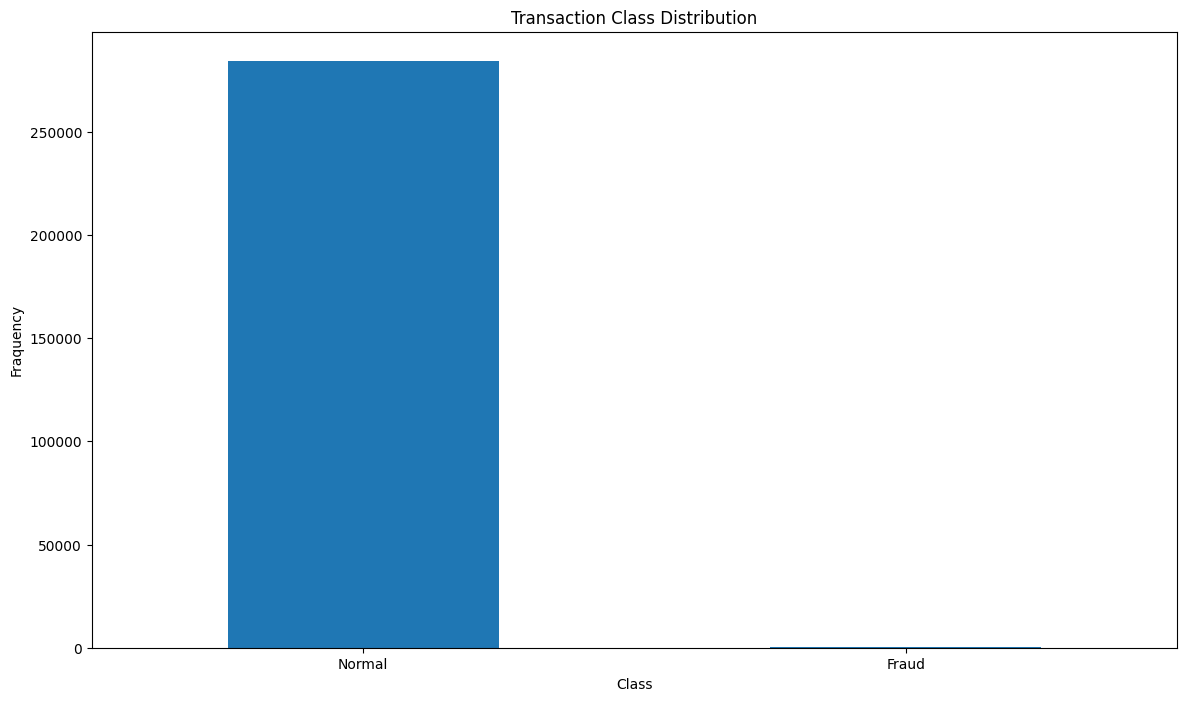

In [42]:
count_classes.plot(kind="bar", rot=0)
plt.title("Transaction Class Distribution")
# Set labels on x-axis
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Fraquency")

From the above figure we can see that this is an extremely imbalanced dataset

In [43]:
## separate the Fraud and the Normal dataset for future reference
Fraud = data[data['Class'] == 1]
Normal = data[data['Class'] == 0]

print(Fraud.shape, Normal.shape)

(492, 31) (284315, 31)


In [44]:
# Statistics of Amount of Fraud Transactions
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [45]:
# Statistics of Amount of Normal Transactions
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

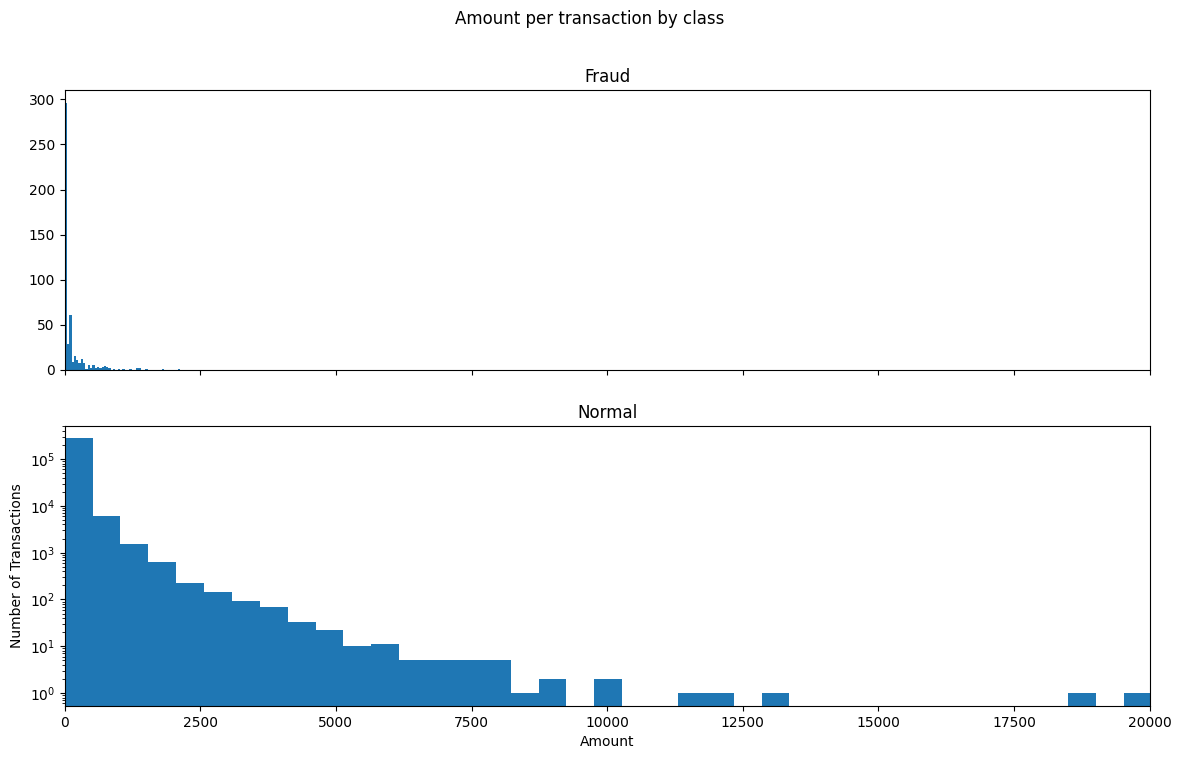

In [46]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
ax1.hist(Fraud.Amount, bins=50)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins=50)
ax2.set_title('Normal')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
# sets the limit of x-axis unit from 0 to 20000
plt.xlim((0, 20000))
# make the y-axis unit in logarithmic scale
plt.yscale('log')
plt.show()

Now let's check how many fraudulent transaction occur in difference time frame

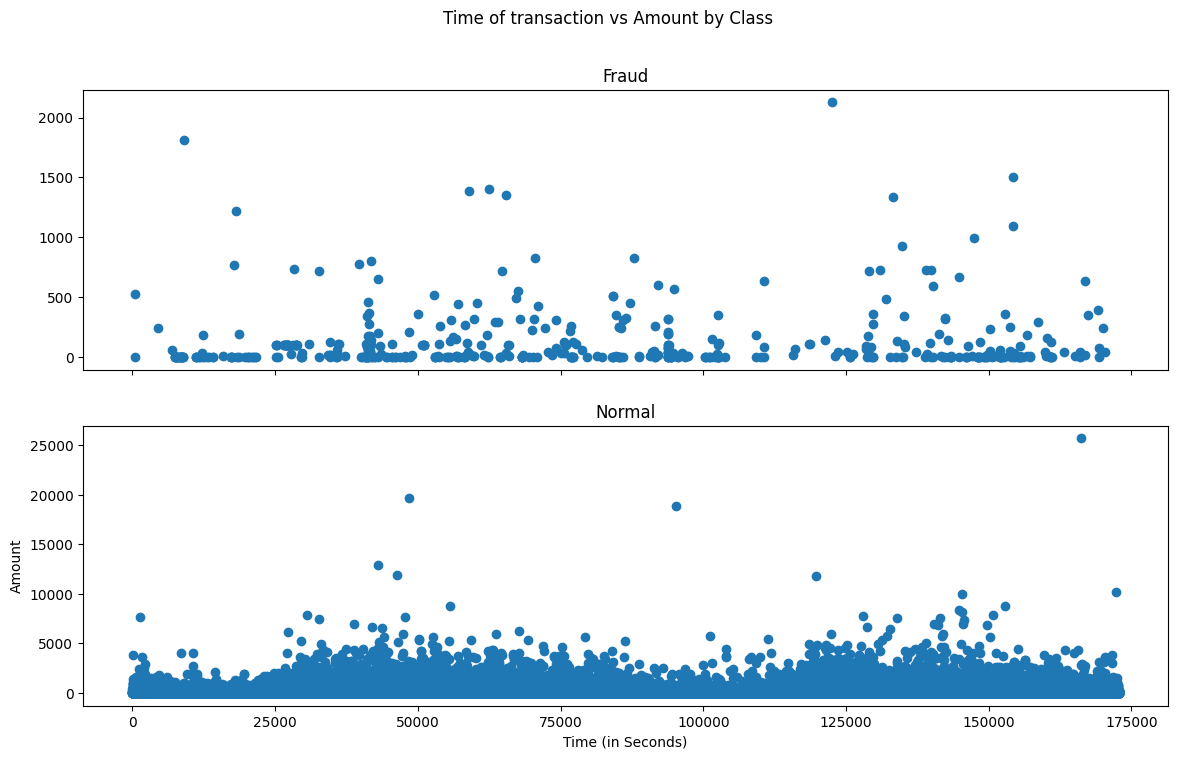

In [47]:
# Create 2 graphs as 2 rows and 1 common column
# between below two graphs share x-axis as common
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle("Time of transaction vs Amount by Class")

# Plot time against amount for fraud transaction
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')

# Plot time against amount for Normal transaction
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')

# Set X-axis label and y axis label and show the result
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

## Data Sampling

In [48]:

# Take a sample of data
data_sample = data.sample(frac=0.1, random_state=1)
# data_sample = data

data_sample.shape

(28481, 31)

In [49]:
# Now we do the rest operation with this sample data to reduce processing
Fraud = data_sample[data_sample['Class']==1]
Valid = data_sample[data_sample['Class']==0]

# Find the ration of Outlier to Normal
outlier_fraction = len(Fraud)/float(len(Valid))

print(outlier_fraction)
print(len(Fraud))
print(len(Valid))

0.0017234102419808666
49
28432


In [50]:
# Create independent and dependent features

# create a list of column names
columns = data_sample.columns.to_list()

# Store the variable we are predicting
target = "Class"

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in [target]]

# Define a random state
# state = np.random.RandomState(42)

X = data_sample[columns]
Y = data_sample[target]

# print(state)
print(columns)
print(X.shape)
print(Y.shape)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
(28481, 30)
(28481,)


## Model Prediction

### K Means

#### Normalise the Data

#### Imports for KMeans

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#### Normalize the attributes

In [52]:
# Normalize the Data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

####Identifying Optimum Number of Clusters

We identify this using *Elbow method*

In [53]:
def optimise_k_means(data, max_k):
  means = []
  inertias = []

  for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(data)

    means.append(k)
    inertias.append(kmeans.inertia_)

  # Generate the elbow plot
  fig = plt.subplots(figsize=(10, 5))
  plt.plot(means, inertias, 'o-')
  plt.xlabel('Number of Clusters')
  plt.ylabel('inertia')
  plt.grid(True)
  plt.show()

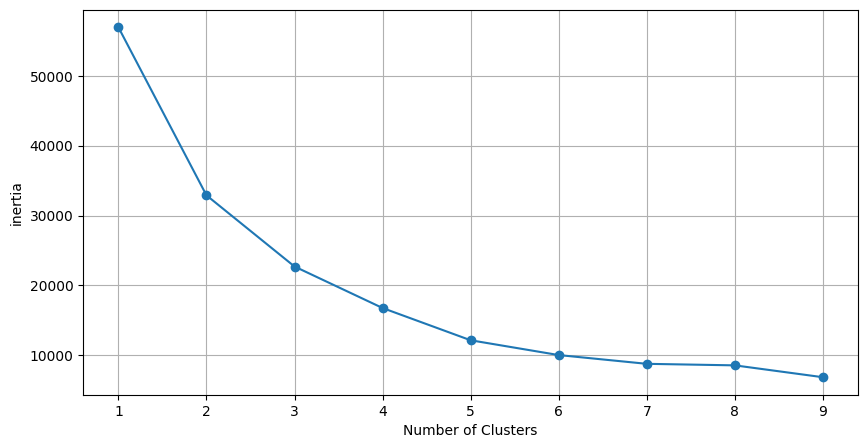

In [54]:
optimise_k_means(X_norm[:,:2], 10)

#### Applying KMeans Clustering

In [55]:
X = data.iloc[:, data.columns != 'Class'].drop(columns=['Time'])
y = data.iloc[:, data.columns == 'Class']

In [56]:
X_normalised = scaler.fit_transform(X)

In [57]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(X)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [65]:
np.unique(labels)

array([0, 1, 2, 3, 4], dtype=int32)

#### Calculate Z-Score

In [58]:
# Calculate Distance to Centroids
distances = np.linalg.norm(X_normalised - kmeans.cluster_centers_[labels], axis=1)
distances

array([ 35.75136808,  36.28447534, 349.31342943, ...,  36.22339036,
        36.59821155, 349.92234805])

In [59]:
# Compute Z-scores of the distances
mean_distance = np.mean(distances)
std_distance = np.std(distances)
z_scores = (distances - mean_distance) / std_distance


#### Find the Anomalies

In [60]:
# Define a threshold for identifying anomalies
# Typically, Z-scores > 3 or < -3 are considered anomalies
# TODO: How to find this
threshold = 9

# Identify anomalies
anomalies = np.abs(z_scores) > threshold
anomaly_indices = np.where(anomalies)[0]

len(anomaly_indices)

591

In [61]:

# Create an array where values at anomaly_indices are 1 and others are 0
y_pred = np.zeros(len(X), dtype=int)
y_pred[anomaly_indices] = 1

In [62]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [29]:
# Convert to NumPy array
y_series = y['Class']

In [31]:
# take the count of errors
n_errors = (y_pred != y_series).sum()
n_errors

1083

In [33]:
print("Accuracy Score: ", accuracy_score(y, y_pred))

Accuracy Score:  0.9961974249228425


In [35]:
print("Confusion Matrix: ")
print(confusion_matrix(y, y_pred))
print("Classification Report: ")
print(classification_report(y, y_pred))

Confusion Matrix: 
[[283724    591]
 [   492      0]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807



# KMeans 2

## Import

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from pylab import rcParams

rcParams['figure.figsize'] = 14, 8

# Answer to the Ultimate Question of Life, the Universe, and Everything
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]

## Load Dataset

In [66]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Numerical/creditcard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Preprocess

In [72]:
data.isnull().values.any()

False

In [74]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_feature = scaler.fit_transform(data.drop('Class', axis=1))

scaled_df = pd.DataFrame(scaled_feature, columns=data.columns[:-1])

In [75]:
scaled_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,1.914365,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151
284803,1.641952,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.077330,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117
284804,1.641974,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.001811,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839
284805,1.641974,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.165300,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

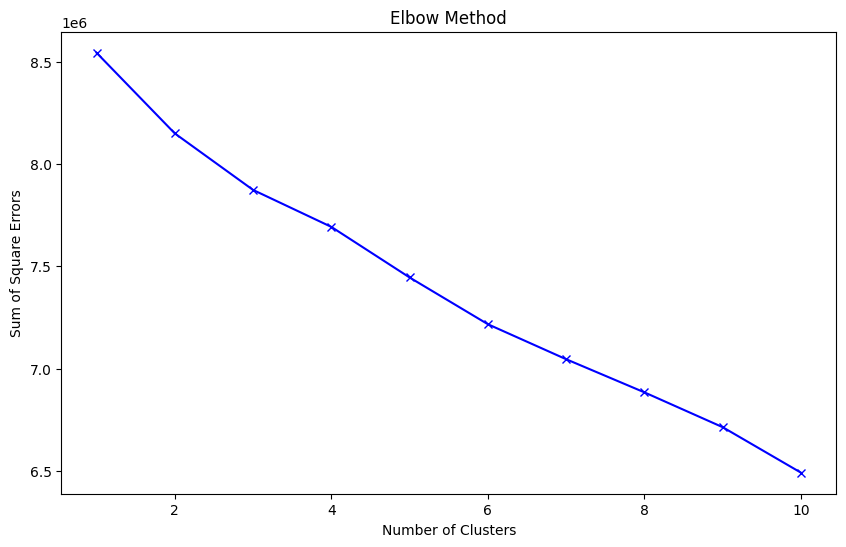

In [77]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbo method to find the optimal number of clusters
sse = []

k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Square Errors')
plt.title('Elbow Method')
plt.show()

In [101]:
optimal_cluster = 9

kmeans = KMeans(n_clusters=optimal_cluster, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [102]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Cluster,Predicted
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,3,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,3,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1,0


In [103]:
np.unique(data['Cluster'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

In [104]:
# Analyze the distribution of the 'Class' in each cluster
cluster_analysis = data.groupby('Cluster')['Class'].value_counts(normalize=True).unstack()
print(cluster_analysis)

Class           0         1
Cluster                    
0        0.997903  0.002097
1        0.999372  0.000628
2        0.995688  0.004312
3        0.999355  0.000645
4        0.164609  0.835391
5        0.999641  0.000359
6        0.998576  0.001424
7        0.999900  0.000100
8        0.990420  0.009580


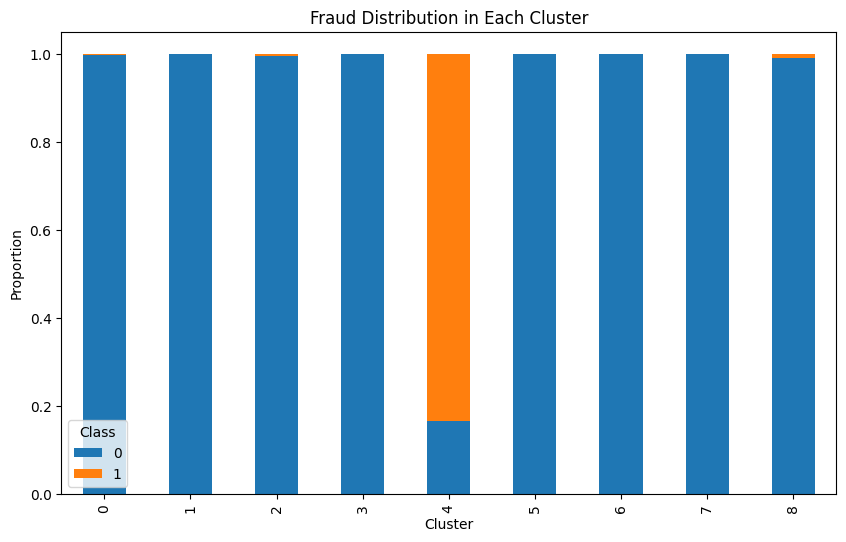

In [105]:
# Plot the distribution
cluster_analysis.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Fraud Distribution in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.show()

## Conclusion

In [106]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [108]:
# Assuming 'data' is your DataFrame and 'Class' is the true label column

# Assign predictions based on cluster 3 being fraudulent
data['Predicted'] = np.where(data['Cluster'] == 4, 1, 0)

In [109]:
# True labels
true_labels = data['Class']

# Predicted labels
predicted_labels = data['Predicted']

In [110]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calculate classification report
class_report = classification_report(true_labels, predicted_labels)

# Display results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[284275     40]
 [   289    203]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.84      0.41      0.55       492

    accuracy                           1.00    284807
   macro avg       0.92      0.71      0.78    284807
weighted avg       1.00      1.00      1.00    284807

